<a href="https://colab.research.google.com/github/Pathuz21/Pathuz21/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import dataset


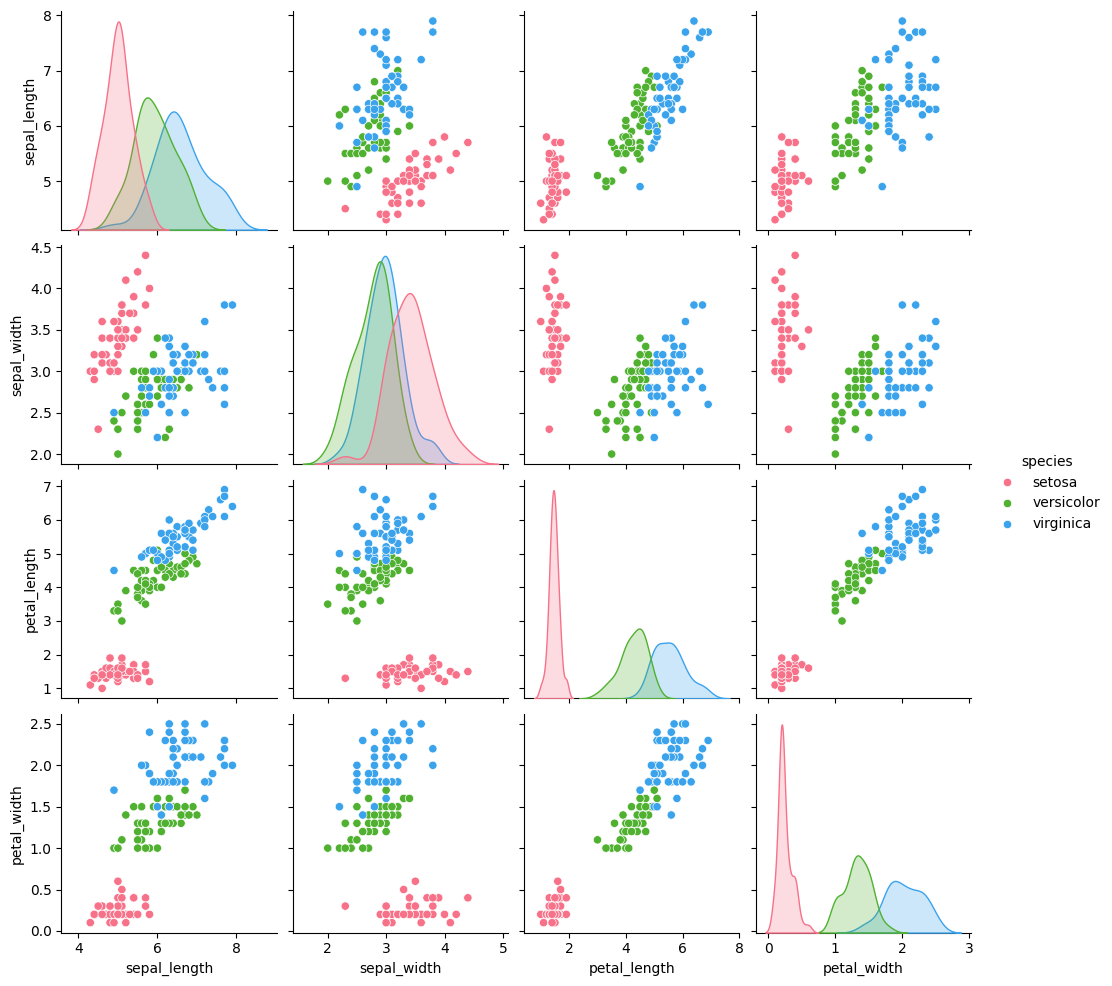

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy Score: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



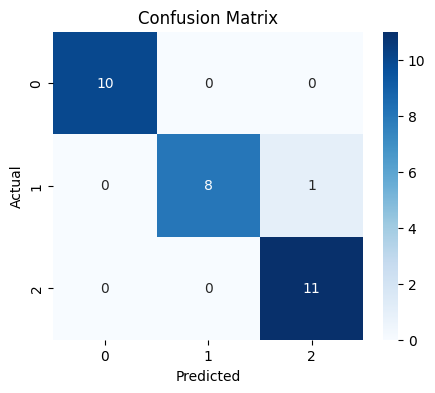

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = sns.load_dataset("iris")

# Pairplot to visualize relationships
sns.pairplot(df, hue="species", palette="husl")
plt.show()

# Encode the target variable (species) into numerical values
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])  # Setosa=0, Versicolor=1, Virginica=2

# Split features and target
X = df.drop("species", axis=1).values
y = df["species"].values

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

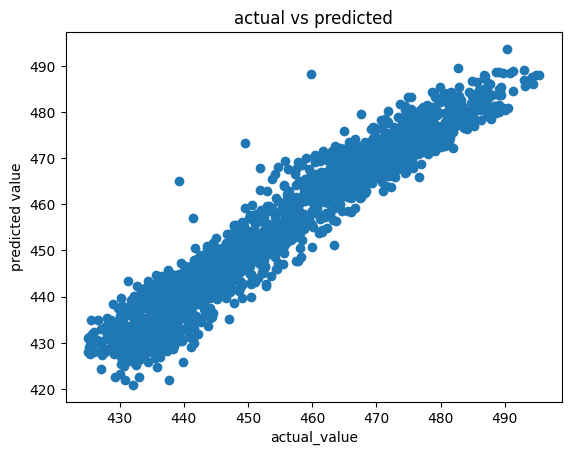

,actual,predicted,difference
0,455.27,455.680208,-0.410208
1,436.31,438.732122,-2.422122
2,440.68,434.164440,6.515560
3,434.40,438.769546,-4.369546
4,482.06,479.888329,2.171671
5,436.07,439.499474,-3.429474
6,452.48,448.840102,3.639898
7,435.22,434.809190,0.410810
8,432.93,435.097364,-2.167364
9,466.46,472.947629,-6.487629


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data_df = pd.read_csv("Folds5x2_pp.csv")

x=data_df.drop(['PE'],axis=1).values
y=data_df['PE'].values
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
ml=LinearRegression()
ml.fit(X_train,y_train)
y_pred=ml.predict(X_test)

r2_score(y_test,y_pred)
plt.scatter(y_test,y_pred)
plt.xlabel("actual_value")
plt.ylabel("predicted value")
plt.title("actual vs predicted")
plt.show()

pred_y_df = pd.DataFrame({'actual':y_test,'predicted':y_pred,'difference':y_test-y_pred})
pred_y_df[0:20]